In [ ]:
#Multiple Linear Regression Analysis of Production Costs
#Joel Njoku SID:2305603
#Week 2 - 27/01/2025 - MOD008912

In [1]:
#Declare Reference to General Libraries
import pandas as pd #Used to manipulate data sets (derived from PANel DAta) pd is an alias
import numpy as np #Used to work with arrays and matrices (e.g. useful for I/O validation)
import matplotlib.pyplot as plt #Used to generate statistical illustrations e.g. graphs
import seaborn as sns

#Import Special Data Analysis Packages
from sklearn.model_selection import train_test_split #Used to split the data set
from sklearn.linear_model import LinearRegression #Selected moddelling algorithm
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error #Used to evaluate the model



In [2]:
#Read and Display Data Set

#First, read in CSV and assign it to a variable called "data"
data = pd.read_csv("data/USA_Housing_Data.csv")

#Second, display maximum rows and columns
print('\nRows Columns') #Indicates rows and columns
print(data.shape) #gets the number of rows and columns of data set

#Third, display first five rows to check data
print(data.head())


Rows Columns
(5000, 6)
        Income  House Age     Rooms  Bedrooms   Population         Price
0  79545.45857   5.682861  7.009188      4.09  23086.80050  1.059034e+06
1  79248.64245   6.002900  6.730821      3.09  40173.07217  1.505891e+06
2  61287.06718   5.865890  8.512727      5.13  36882.15940  1.058988e+06
3  63345.24005   7.188236  5.586729      3.26  34310.24283  1.260617e+06
4  59982.19723   5.040555  7.839388      4.23  26354.10947  6.309435e+05


Axes(0.125,0.11;0.62x0.77)


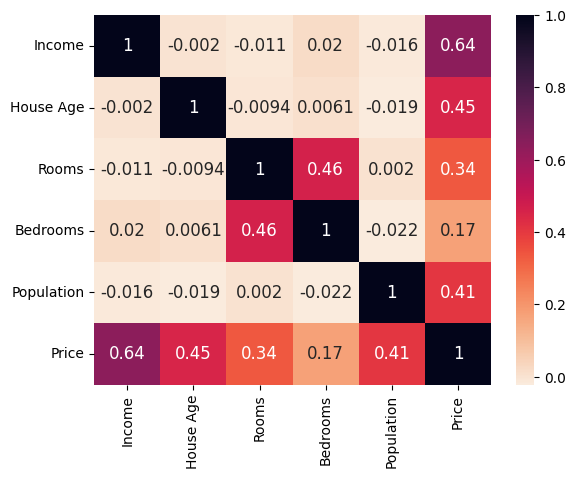

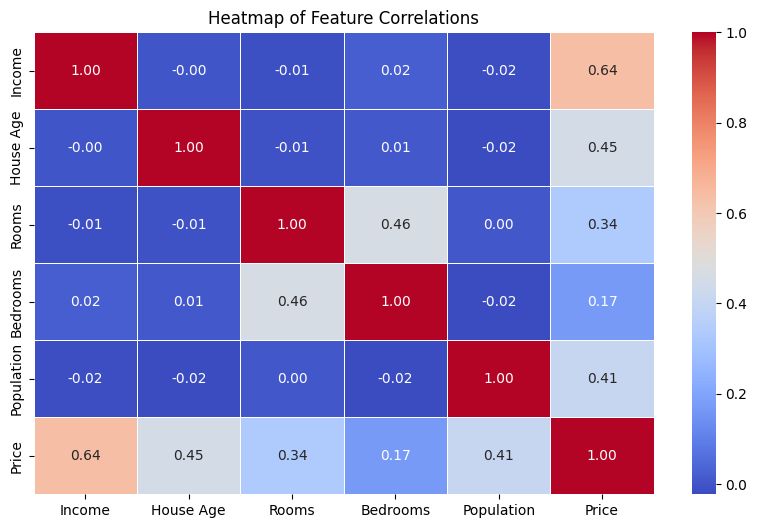

In [3]:
#Display Feature Relations of Data Set
print(sns.heatmap(data.corr(),annot=True, annot_kws={"size":12}, cmap= sns.cm.rocket_r))

plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Feature Correlations")
plt.show()

In [4]:
#Declare X and Y Variables and Split the Dataset into Train and Test sections
X=data.drop(['Price'], axis=1).values #X Variables = all common except the last one

#Declare last column to be the Dependent variable Y
y=data['Price'].values #Y Variable = last column

#Split Data Set 70% training and 30% Testubg. Initial data shuffle to zero
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,test_size=0.3, random_state=0)

In [5]:
#Create and Test the Model

#First, declare a new model
linear_model = LinearRegression()

#Second, Train (fit) the model from the training data
linear_model.fit(X_train, y_train)

#Third get Coefficients
print('\nIntercept = ', linear_model.intercept_) #Find Bias Intercept
print('\nCoefficients = ', linear_model.coef_)#Find Weightings

#Fourth, Test the model using the testing data
y_pred = linear_model.predict(X_test)
print('\nTest Data Model = ', y_pred)


Intercept =  -2644788.977414628

Coefficients =  [2.16187374e+01 1.66145180e+05 1.21010577e+05 1.76003779e+03
 1.51647974e+01]

Test Data Model =  [ 969608.34686742  953868.15550976  907506.3282481  ... 1423701.02106518
  744400.93306007  488525.83115774]



R-Squared =  0.9200757649506066

Mean Absolute Error =  81563.1473260353

Mean Squared Error =  10337337827.0491

Root Mean Squared Error =  101672.6995168767


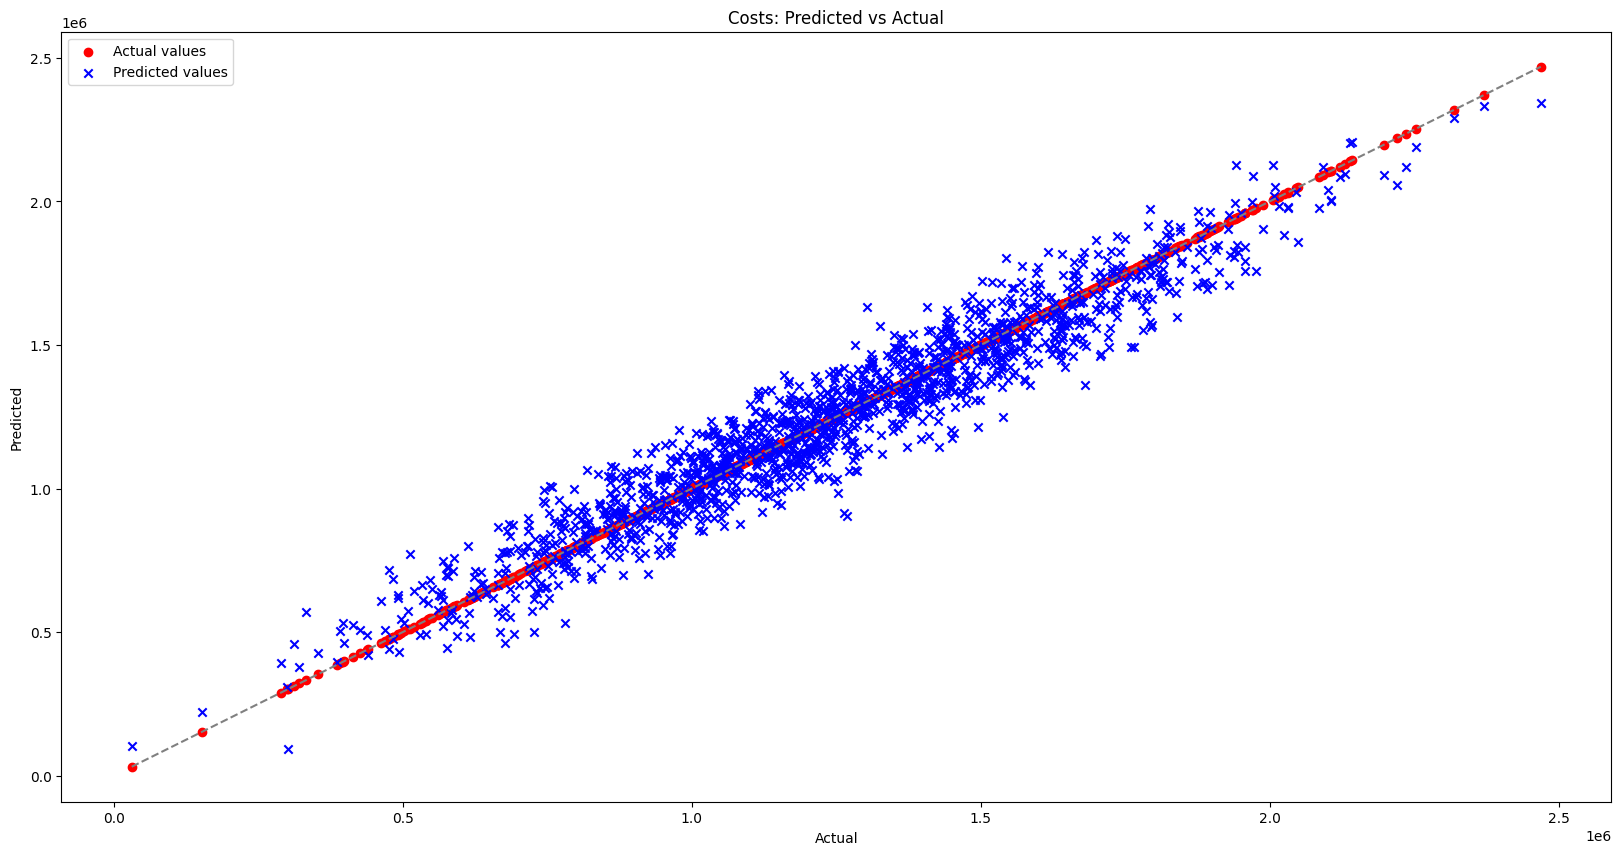

In [6]:
#Evalute the model

#First Plot Actual vs Predicted
plt.figure(figsize=(20,10))
plt.title("Costs: Predicted vs Actual")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.scatter(y_test, y_test, c='red', marker='o', label = 'Actual values')
plt.scatter(y_test, y_pred, c='blue', marker='x', label = 'Predicted values')
#Add diagonal line for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray')
plt.legend()

#Second, Calculate Perfomance metrics
r_squared = r2_score(y_test, y_pred) #R-squared value (how well the model fits on a scale of 0-1)
print('\nR-Squared = ', r_squared)
mean_abs = mean_absolute_error(y_test, y_pred) #Mean Absolute Error
print('\nMean Absolute Error = ', mean_abs)
mean_sqr = mean_squared_error(y_test, y_pred) #Mean Squared Error
print('\nMean Squared Error = ', mean_sqr)
root_mean_sqr = root_mean_squared_error(y_test, y_pred) #Root Mean Squared Error
print('\nRoot Mean Squared Error = ', root_mean_sqr)

In [7]:
#Validate the model with own (unseen) test data
Product_Units = []
print("\nEnter values for independent variables: ")

#Collect user input for each feature by:
#Retrieve column names from data frame
#Read in the user input
#Validate the model with own (unseen) test data
Product_Units = []
print("\nEnter values for independent variables: ")

#Show data head to remind user of variables
print(data.head())

#Collect user input for each feature by:
#Retrieve column names from data frame
#Read in the user input
#Write and update a list

for i, column_name in enumerate(data.columns[:-1]):
          value = float(input(f"{column_name}: "))
          Product_Units.append(value)

#Convert the costs to a NumPy array and reshape
Product_Units = np.array(Product_Units).reshape(1, -1) #Reshape for single prediction

#Predict the cost using the Linear regression model
predicted_cost = linear_model.predict(Product_Units)
print(f"\nPredicted Price: ", {predicted_cost[0]})

#Convert the costs to a NumPy array and reshape
Product_Units = np.array(Product_Units)

#Predict the cost using the Linear regression model
predicted_cost = linear_model.predict(Product_Units)
print(f"\nPredicted Price: ", {predicted_cost[0]})


Enter values for independent variables: 

Enter values for independent variables: 
        Income  House Age     Rooms  Bedrooms   Population         Price
0  79545.45857   5.682861  7.009188      4.09  23086.80050  1.059034e+06
1  79248.64245   6.002900  6.730821      3.09  40173.07217  1.505891e+06
2  61287.06718   5.865890  8.512727      5.13  36882.15940  1.058988e+06
3  63345.24005   7.188236  5.586729      3.26  34310.24283  1.260617e+06
4  59982.19723   5.040555  7.839388      4.23  26354.10947  6.309435e+05


ValueError: could not convert string to float: ''